# Analysis Techniques - Statistical Methods - Index


## Universidade de Santiago 

---

## Lecture I -  Basic concepts

*Author: Jose A. Hernando*, January 2020

*Instituto Galego de Altas Enerxías. Universidade de Santiago de Compostela, Spain.*

In [1]:
import time
print( ' Last Execution ', time.asctime())

 Last Execution  Mon Feb  3 18:08:32 2020


In [3]:
# general imports
%matplotlib inline
%reload_ext autoreload
%autoreload 2

# numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats       as stats
import scipy.optimize     as optimize 

import htintro_examples  as htexam

plt.style.context('seaborn-colorblind');

## 1. Baye's Theorem 

### Kolmogoriv axioms

Nature is probabilistic. 

The starting point of probability are the **Kolmogorov axioms**:

* The probability for an event, $E$, is non negative $P(E)\ge 0$.
* The probability for the entire space of possibilities, $\Omega$, is one, $P(\Omega) = 1$.
* The probability for disjoint events, $E_1,\dots,E_n$, is additive, $P(E_1  \dots  \cup E_n) = \sum_{i=1,n} P(E_i)$.

From there we obtain the following corollaries:
* $P(A \cup B) = P(A) + P(B) - P(A \cap B) $
* $P(!E) = 1- P(E)$ 

  where $!E$ is probability that $E$ does not happen.

### Bayes' theorem

The probability $P(A)$ that an event happens is called **marginal probability**. 

  For example, the probability to roll a dice and get 3.

The probability that an event $A$ happens if another one $B$ has happened is called **conditional probability**, $P(A|B)$.

  For example, the probability that rolling your dice is 3 if you know that the number obtained was odd, in that case $P(3|\mathrm{odd})=1/3$. 


The Bayes' theorem relates both probabilities: if $A,B$ are two events with marginal probabilities $P(A),\, P(B)$, the conditional probabilities $P(A|B), \, P(B|A)$ are:

$$
P(A|B) \, P(B) = P(B|A)\,P(A)
$$

**Example:** consider the experiment of rolling two dices, $A$ is the case when the sum of both dices is 6, and $B$ when one of them is 4. Verify the Baye's theorem.

The probability to get six adding both dices is $P(A)= 5/36$, possible outcomes are $\{(1,5),(2,4),(3,3),(4,2),(5,1)\}$.

The probability to get four when the addition is six is $P(B|A)=2/5$. 

The probability to get a dice with four is $P(B)=11/36$. 

The probability that both add six if one is four is $2/11$, therefore:

$$
\frac{11}{36} \, \frac{2}{11} = \frac{2}{5} \, \frac{5}{36} = \frac{1}{18}
$$

**Exercise:** The probability of an individual to have HIV+ is 1 in 10000. Consider a medical test of HIV. If the patient is HIV+, the test is positive in 99 % of the times, but if the person is HIV- person, the test can wrongly be positive in 2 % of the times. After a test, a patient is diagnosed with HIV+, what is the probability that he has HIV +? Should the doctor repeat the test?



$$
p(H+ | +) = \frac{p(+ | H+) p(H+)}{p(+)} =  \frac{p(+ | H+) p(H+)}{p(+ | H+) p (H+) + p(+ | H-) p (H-)}
$$

con

$$
p(H+) = 10^{-4}, \; p(H-) = 1-10^{-4}, \; p(+ | H+) = 0.99, \; p(+ | H-) = 0.02 
$$

In [9]:
def bayes_pax(pa, pxa, pxnoa):
    return (pxa * pa) / (pxa * pa + pxnoa * (1-pa))

pax = bayes_pax(1e-4, 0.99, 0.00002)
print(pax)

0.8319467554076538


**Exercise:** A neutrino experiment has a problem with the DAQ, and 5% of the runing time it does not observe interactions. The neutrinos are produced by a reactor nearby that operates 75% of the time. In this moment, the experiment does not observe neutrinos, what is the probability that the reactor is off?

## 2. Probability density functions


Measurements are of probabilistic nature, there are **random variables** (rv). 

The distribution probability, $g(x)$, that follow a rv is called **probability density function**, pdf. 

If $x$ takes discrete values, it called **probability mass function**, pmf. 

Here we will abuse the lenguate and call them both as 'pdf'.


In most of the cases the pdfs depends on some parameters $\mu$, indicated as $g(x | \mu)$.


From the probability axions we have: 

$$
\int_{-\infty}^{\infty} g(x) \, \mathrm{d}x = 1
$$

We define the cumutative density function, cdf, $F(x)$, as:

$$
F(x) = \int_{-\infty}^{x} g(x) \, \mathrm{d}x
$$

###  Common probability density functions 

The most commont distributions in HEP are:

* **Binomial**. A event can happen with probability $p$. The probability to get $n$ events if we try $N$ times is given by the binomial pdf. 

$$
g(n|N,p) = \frac{N!}{n! (N-n)!} p^n (1-p)^{N-n}
$$

* **Poisson**. Number of events if we expect $\nu$. i.e the number of interactions in a crossing of the LHC beams is modeled with a poisson. Nuclear decays are poisson distributed too.

$$ 
g(n|\nu) = \frac{\nu^n}{n!} e^{-\nu}
$$ 

* **Uniform**. Equal probability to get $x$ in an interval $[a, b]$.

$$
g(x|a,b) = \frac{1}{(b-a)}
$$



* **Exponential**. An event can happen in $x$ with probability $1/\tau$. i.e The time of particles decays.

$$
g(x|\tau) = \frac{1}{\tau} e^{-x/\tau}
$$

* **Gaussian** (or normal). Associated with the distributions of measurements.

$$ 
g(x|\mu,\sigma) = \frac{1}{\sqrt{2\pi} \sigma} e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$ 

* **$\chi^2_n$** with $n$ degrees of freedom. Associated with goodness of fit.

$$
g(x|n) = \frac{1}{2^{n/2} \Gamma(n/2)} x^{n/2-1}e^{-x/2}
$$


* **Breit-Wigner**. Describes the distribution of masses in resonances. 

$$
g(x|\Gamma,x_0) = \frac{1}{\pi} \frac{\Gamma/2}{\Gamma^2/4 + (x-x_0)^2} 
$$

* **Beta**. Associated with the measurement of probabilities. Used in Bayesian statistics.

$$
g(x | \alpha,\beta) = \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)} x^{\alpha-1} (1-x)^{\beta-1}
$$

where $x, \alpha, \beta$ are positive.
* **Gamma**. Associated with bayesian statistics with poisson distributions. 

$$
g(x | \alpha,\beta) = \frac{\beta^\alpha}{\Gamma(\alpha)} x^{\alpha-1} e^{-x \beta}
$$

where $x, \alpha, \beta$ are positive.




Some of the pdfs are nicely related:

In the case that an event is rare, has a small probability, $p$, but we do a large number of trials, $N$, the events distribution follows a binomial with $g(n | N, p)$, if $ N \, p = \nu$ is constant, and $N$ is large enough and $p$ small enough, the binomial is equivalent to a Poisson with mean $\nu$, $g(n | \nu)$.

For example nucleus decays follow this rule: large trials ($N$, number of nucleus) and small decay probability ($p$).

When $\nu$ is "large", 12 is enough, the Poisson transforms into Gaussian with $\mu=\nu, \sigma = \sqrt{\mu}$.

When we take n values of $x$, gaussian distributed, with mean $\mu$ and sigma $\sigma$, and compute $\chi^2 = \sum_{i=1,n} \frac{(x_i -\mu)^2}{\sigma^2}$, it follows a chi-squared distribution with $n$ degrees of freedom.



**Exercise:** Compare a poisson distribution, with $\nu=p \, N$ with a binomial when $N$ is large and $p$ is small.

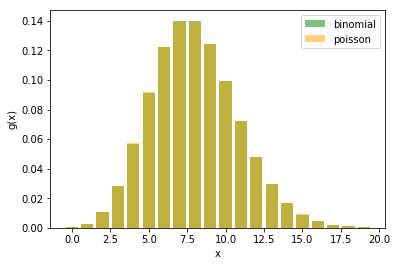

In [11]:
N, p = 1000, 0.008; ns = np.arange(20)
plt.bar(ns, stats.binom.pmf(ns, N, p) , color='green' , alpha=0.5, label='binomial')
plt.bar(ns, stats.poisson.pmf(ns, N*p), color='orange', alpha=0.5, label='poisson')
plt.xlabel('x'); plt.ylabel('g(x)'); plt.legend();

**Exercise:** Compare a gaussian distribution, with $\mu=p \, N, \, \sigma = \sqrt{\mu}$ with a binomial when $N$ is large and $p$ is small and $\mu = N p > 50$.

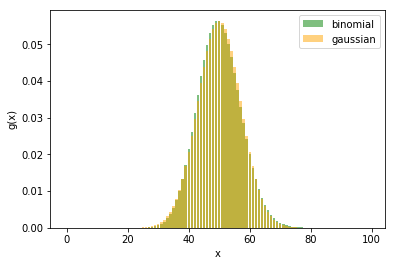

In [12]:
N, p = 1e4, 50./1e4; ns = np.arange(100)
plt.bar(ns, stats.binom.pmf(ns, N, p)            , color='green' , alpha=0.5, label='binomial')
plt.bar(ns, stats.norm.pdf(ns, N*p, np.sqrt(N*p)), color='orange', alpha=0.5, label='gaussian')
plt.xlabel('x'); plt.ylabel('g(x)'); plt.legend();


**Exercise:** Check that from a "large" $\nu$ the poisson distribution is equivalent to a gaussian distribution.

**Exercise:** Generate $m$ datasets, each one with $n$ data, $x_i$ distributed random in $[0, 1]$ interval, sum the $n$ numbers, $\sum_i^n x_i$ and obtain the distribution of the $m$ samples.


**Exercise:** Generate $m$ datasets, each with $n$ data, $x_i$, normal distributed, compute its distance squared $\chi^2 = \sum_{i=1}^n x^2_i$, what is the distribution of $\chi^2$?

**Exercise:** Generate $n$ $x_i$-values, each one gaussian distributed with mean $\mu_i$ and sigma $\sigma_i$, show that the sum $\sum_i x_i$ is gaussian distributed with mean, $\mu = \sum_i \mu_i$, and sigma $\sigma^2 = \sum_i \sigma^2_i$.

### Expectation values

Given a $x$ rv that follows a pdf, $\, g(x)$, and a function $f(x)$ on $x$, we define the expected value of $g(x)$ as:

$$
E[g(x)] \equiv \int f(x) \, g(x) \, \mathrm{d}x
$$

The **mean**, or average value, is the expected value of $x$:

$$
E[x] = \mu \equiv  \int x \, g(x) \, \mathrm{d}x
$$

The **variance** is the expected value of $(x-\mu)^2$:

$$
V[x] = \sigma^2 = E[(x-\mu)^2]= E[x^2]-\mu^2 \equiv \int (x-\mu)^2 \, g(x) \, \mathrm{d}x
$$

We call **standard deviation** to: $\sigma = \sqrt{V[x]}$




The **expected value** is the $x$ value with the highest probability $g(x)$.

The **median**, is the $x_{med}$ value that divides the distribution in half, 

$$
\int_0^{x_{med}} g(x) \mathrm{d}x = 0.5
$$

For a symmetric pdf, the mean and median are the same.


If ${\bf x}$ is a vector, the pdf is a n-dimensional function. 
We define the covariance element between $i$ and $j$ elements as:

$$
\mathrm{cov}[x_i,x_j] = \int x_i \, x_j \, g({\bf x}) \; \Pi_{i=1,n} \mathrm{d}x_i
$$

If the variables $x_i, \, x_j$ variables are independent then the covariance is zero. 
The contrary is not necessarily true.



We call **marginal** pdf when one or more rvs are integrated out, for example if we integrate $x_n$:
$$
g(x_1,\dots,x_{n-1}) = \int g({\bf x}) \mathrm{d}x_n
$$

We can "project" the pdf in one axis, that is get the marginal pdf for each variable $x_i$ individually:
$$
g(x_j) = \int g({\bf x}) \, \Pi_{i=1,n; i \neq j} \, \mathrm{d}x_i
$$



**Exercise:** Get the poisson distribution from a Gamma distribution.

**Exercise:** Get an exponential distribution from a Gamma distribution.

**Exercise:** Get the $\chi^2$ distribution from a Gamma distribution.

**Exercise:** Study the Beta distribution for different parameters of $\alpha, \beta$ (start $\alpha=\beta=1$).

### Likelihood 
A frequentist evaluate the likelihood of its data.

The **probability density function**, *pdf*, $g(x | \mu)$is the probability to measure $x$, which depends on the parameters $\mu$.

A **likelihood** is the probability evaluted on a observation data, $x$, (on data!)



For n, $x$, independent measurements that follow a pdf, $g(x | \mu)$, the likelihood is the product of the likelihood of each measurement $x_i$:

$$
\mathcal{L}(x | \mu) = \Pi_{i=1}^n g(x_i | \mu)
$$


The likelihood can be a very small number, for that reason, it is common to take the logarithm, and called **log likelihood**:

$$
\ln \mathcal{L}(x |\mu) = \sum_{i=1}^n \ln \left(g(x_i |\mu) \right)
$$

If $\mu$ is known, the likelihood is an real number, if not, $\mathcal{L}(x | \mu)$ is a function of the $\mu$ parameter(s).




Given data $x$, with $\mu$ unknown, the likelihood is a function that depends on the parameter(s) $\mu$, $\mathcal{L}(x | \mu)$. 

Frequentists usually estimate the best-parameters, $\hat{\mu}$, as the parameters that maximize the likelihood ($\mathcal{L}(x | \hat{\mu})$ is maximum).

But for convenience, we use instead:

$$
-2 \log \mathcal{L}(x |\mu)
$$

And then $\hat{\mu}$ minimize the log-likelihood.

## 3. Frequentist vs Bayesians

The is a great divide in statistics: frequentist vs Bayesians. 

**Frequentist are inductive**. *They compute the probability of an observation by repeating the same experiment many times*. They test is the data is compatible with the theory. 


**Bayesians are deductive**. *They compute the probability using the Bayes' theorem. 
They measure the credibility of a theory based on the data, but they need to assign first a prior probability based in a 'reasonable' initial guess*. 



Frequentists measure a **likelihood function**:

$$
\mathcal{L} (x | \mu)
$$

Frequentists usually estimate the best-parameters, $\hat{\mu}$, as the parameters that maximize the likelihood ($\mathcal{L}(x | \hat{\mu})$ is maximum).

Bayesians measure a **posterior probability**:

$$
p(\mu | x)
$$

using an initial prior $\pi(\mu)$ probability and the Bayes' theorem.

A conversation of a bayesian and a frequentist:

<img src="./figs/bayes_cartoon.png" width="500">



Most of physicist we are bayesians, but we think of ourselves as frequentists. 

Consider the discovery of the Higgs. 

A frequentist claims: *"LHC data strongly disagrees with the hypothesis of the SM without the Higgs and agrees with a Higgs."* 

While a Bayesian claims: *"We have discovered the Higgs!"*




A joke in HEP (L. Lyons quotation?)

Frequentists use implecable logic to answer questions that nobody cares about.

Bayesians address the questions that everyone is interested on using assumptions that nobody believes


###  Likelihood and posterior  probability - An example

Let's consider the basic measurement case seen by a frequentist and by a bayesian.

We just measure a quantity $\mu$ using a set of data $x$. Data $x$ are gaussian distributed with known sigma, $\sigma$. We want to estimate $\hat{\mu}$.

For example, $x$ is a set of values from a gaussian distribution with mean zero and sigma one. How to estimate $\hat{\mu}$?

Obvious, it is the average! And the uncertanty in the average is $\sigma/\sqrt{n}$, where $n$ is the number of events in our sample!


**Example**: Generate a n-size sample with $x$ values generated random from a normal gaussian. The likelihood function is drawn as a function $\mu$. The best-estimate $\hat{\mu}$ is the value where the likelihood is maximum.

$$
- 2 \log \mathcal{L}(x | \mu ) = - 2 \sum_{i=1}^n \log g(x | \mu)
$$


**Explore:** Generate $n$ samples of a normal. Compute the likelihood as function of the mean (fix sigma of the gaussian to 1).

mu mean : -0.05929570168988754 , mu std : 0.5


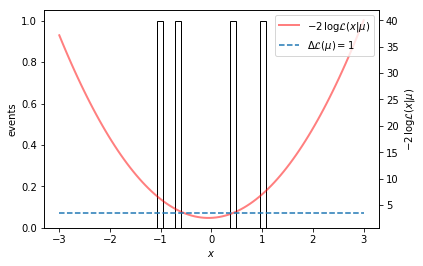

In [21]:
nsize = 4
xs = stats.norm(0., 1.).rvs(nsize)
htexam.normal_likelihood(xs);
#plt.yscale('log');

### Posterior probability in bayesian statistics

Bayesians improve a prior probability, "knowledge", of an hypothesis using data.

Suppose that we have an ensemble of possible hypotheses $\mu$, each one with a prior probability $\pi(\mu)$. 

Os course:

$$
\int \pi(\mu) \, \mathrm{d}\mu = 1
$$

Or, if the hypotheses are descrete:

$$
\sum \pi(\mu) = 1
$$


Given some data, $x$, Bayes' theorem allow us to compute the **posterior probability**. 

The posterior probability,  $p(\mu|x)$, of $\mu$ given $x$ is: 

$$
p(\mu|x) = \frac{p(x|\mu) \, \pi(\mu)}{ p(x)}
$$





That is:

$$
p(\mu|x) = \frac{p(x|\mu) \, \pi(\mu)}{\int p(x|\mu) \pi(\mu) \, \mathrm{d}\mu}
$$


if the hypotheses are discrete:

$$
p(\mu|x) = \frac{p(x|\mu) \, \pi(\mu)}{\sum p(x|\mu) \pi(\mu)}
$$



**Example:** Consider the example above. An sample of $n$ measurements from a normal distribution. Obtain the posterior probability of the mean, if the sigma is know. 

Consider a unique data $x_0$, from a gaussian distribution $g(x | \mu, \sigma = 0)$, and a 'reasonable' uniform prior $\pi(\mu) = 1$.

The posterior probability using bayes is:

$$
p(\mu | x_0) = \frac{g( x_0 | \mu, \sigma = 1) \, \pi(\mu)}{ \int g(x_0 | \mu, \sigma = 1)  \, \pi(\mu) \, \mathrm{d} \mu } = g(x_0 | \mu, \sigma = 1)
$$

that is, a gaussian with sigma unity and centered at $x_0$!


**Exercise:** Show that the posterior of n measurements, $x$, normal distributed, $g(x | \mu, \sigma)$, with a flat prior on $\mu$, and known $\sigma$, is a gaussian with mean $\mu = \bar{x}$, the average of the $n$ $x$ measurements, and the sigma $\sigma/\sqrt{n}$

posterior integral 1.000


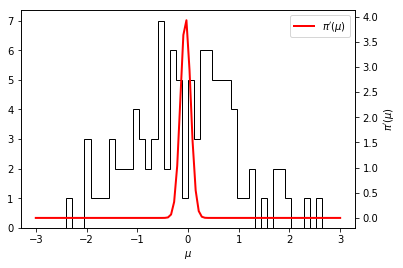

In [25]:
nsize = 100
xs = stats.norm(0., 1.).rvs(nsize)
htexam.normal_posterior(xs);

mu mean : -0.45975776821345954 , mu std : 0.31622776601683794
posterior integral 1.000


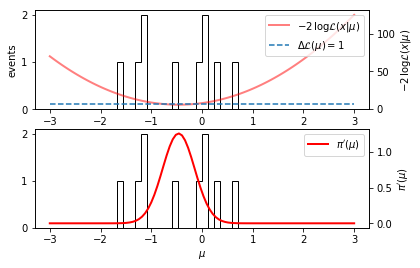

In [26]:
nsize = 10
xs    = stats.norm(0., 1.).rvs(nsize)
plt.subplot(2, 1, 1); htexam.normal_likelihood(xs)
plt.subplot(2, 1, 2); htexam.normal_posterior(xs);

**Exercise:** Show that the posterior of a normal prior, $\pi(\mu | \mu_0, \sigma_{\mu_0})$,
and a normal likelihood, $p(x |\mu, \sigma)$, for n-measurements, $x$, is a normal distribution with mean, $\mu'$, and sigma, $\sigma_{\mu'}$:

$$
\frac{1}{\sigma^2_{\mu'}} = \frac{n}{\sigma^2} + \frac{1}{\sigma^2_{\mu_0}}, 
\;\;\;
\mu' = \sigma^2_{\mu'} \left( \frac{\mu_0}{\sigma^2_{\mu_0}} + \frac{\sum_i x_i}{\sigma^2} \right)
$$

**Exercise:** There are several dices in a box, with 4, 6, 12 and 24 sides. We randomly pick one dice and we roll it four times. The outcomes are $\{1,4,5,2\}$. What is the posterior probability that the selected dice has 4, 6, 12 or 24 sides? What is the posterior probability if we roll it twice again and wet get now 6 and 1? 

In [10]:
measurements = [1, 4, 5, 2]
hpriors      = [0.10, 0.20, 0.20, 0.50]
for meas in measurements:
    hpriors = htexam.dice_posterior(meas, hpriors) 
    print('data :', meas, ' posteriors: ', hpriors)

!
data : 1  posteriors:  [0.26086957 0.34782609 0.17391304 0.2173913 ]
!
data : 4  posteriors:  [0.44444444 0.39506173 0.09876543 0.0617284 ]
!
data : 5  posteriors:  [0.         0.8590604  0.10738255 0.03355705]
!
data : 2  posteriors:  [0.         0.93260474 0.0582878  0.00910747]
